In [1]:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\pulzara\AppData\Local\Temp\ipykernel_15864\3814626351.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


**Python version 3.8.12**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels
from scipy import stats 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pylab import rcParams 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)


import gc

In [2]:
data = pd.read_table('../data/Modelar_UH2022.txt', delimiter = '|', encoding = "UTF-8") 

# Analisis Exploratorio de Datos 

*Analizamos los valores nulos de cada columna del dataset*

In [96]:
data.isnull().sum()

ID                        0
SAMPLETIME                0
READINGINTEGER            0
READINGTHOUSANDTH    140056
DELTAINTEGER              0
DELTATHOUSANDTH      140056
dtype: int64

**Analizaremos 4 IDs selecionados de manera aleatoria**

In [4]:
random.seed(23) 
x = [random.randrange(0, 2748, 2) for p in range(0, 4)]   
x 
#[1186, 342, 68, 2424]

[1186, 342, 68, 2424]

*Observamos el tipo de variables que contiene el dataframe*

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21404828 entries, 0 to 21404827
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 int64  
 1   SAMPLETIME         object 
 2   READINGINTEGER     int64  
 3   READINGTHOUSANDTH  float64
 4   DELTAINTEGER       int64  
 5   DELTATHOUSANDTH    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 979.8+ MB


*Creamos nuevos dataframes para los 4 IDs diferentes*

In [5]:
data1 = data[data.ID == x[0]]    
data1 = data1.sort_values(by= "SAMPLETIME", ascending=True)
data1 = data1.reset_index(drop = True)  

data2 =  data[data.ID == x[1]]    
data2 = data2.sort_values(by= "SAMPLETIME", ascending=True)
data2 = data2.reset_index(drop = True)  

data3 =  data[data.ID == x[2]]    
data3 = data3.sort_values(by= "SAMPLETIME", ascending=True)
data3 = data3.reset_index(drop = True)  

data4 =  data[data.ID == x[3]]     
data4 = data4.sort_values(by= "SAMPLETIME", ascending=True)
data4 = data4.reset_index(drop = True) 

*Revisamos si existe algun valor nulo dentro del Id seleccionado*

In [5]:
data1.isnull().sum() 

ID                   0
SAMPLETIME           0
READINGINTEGER       0
READINGTHOUSANDTH    0
DELTAINTEGER         0
DELTATHOUSANDTH      0
dtype: int64

In [6]:
data2.isnull().sum() 

ID                   0
SAMPLETIME           0
READINGINTEGER       0
READINGTHOUSANDTH    0
DELTAINTEGER         0
DELTATHOUSANDTH      0
dtype: int64

In [7]:
data3.isnull().sum() 

ID                   0
SAMPLETIME           0
READINGINTEGER       0
READINGTHOUSANDTH    0
DELTAINTEGER         0
DELTATHOUSANDTH      0
dtype: int64

In [8]:
data4.isnull().sum()  

ID                   0
SAMPLETIME           0
READINGINTEGER       0
READINGTHOUSANDTH    0
DELTAINTEGER         0
DELTATHOUSANDTH      0
dtype: int64

*No se encontraron valores nulos*

*graficamente es posible determinar los valores nulos, realizando un heatmap* 

<AxesSubplot:>

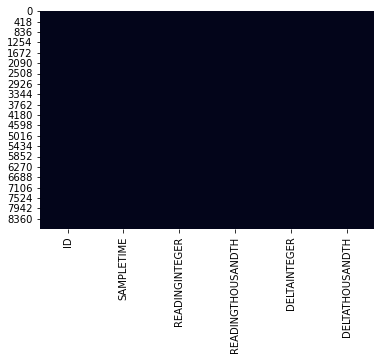

In [13]:
sns.heatmap(data2.isnull(), cbar=False) 

*Observamos el comportamiento estadistico descriptivo de los 4 IDs diferentes para entender su comportamiento.* <br> 
*Por medio del boxplot entenderemos donde se encuentra la mediana de los datos*

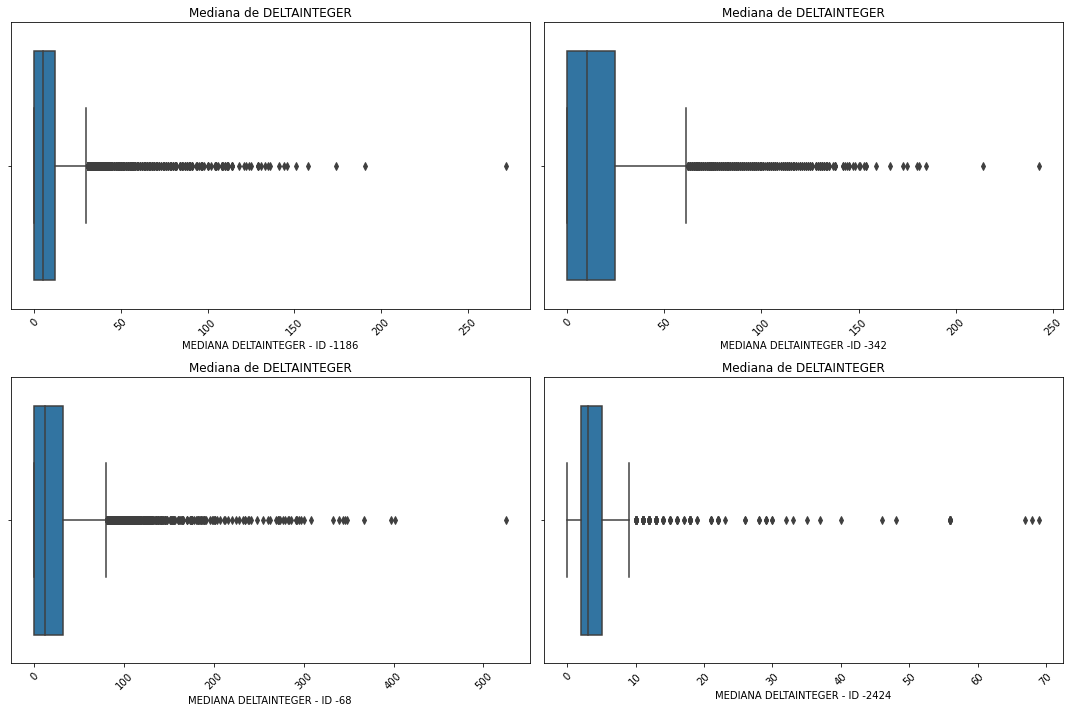

In [9]:
#diagrama de caja 

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x ='DELTAINTEGER', data = data1)
plt.xticks(rotation=45)
#plt.xlim(000,700000)
plt.xlabel(f'MEDIANA DELTAINTEGER - ID -{int(data1.ID.unique())}')
plt.title('Mediana de DELTAINTEGER')  




plt.subplot(2,2,2)
sns.boxplot(x='DELTAINTEGER', data = data2)
plt.xticks(rotation=45)
plt.xlabel(f'MEDIANA DELTAINTEGER -ID -{int(data2.ID.unique())}')
plt.title('Mediana de DELTAINTEGER') 
 


plt.subplot(2,2,3)
sns.boxplot(x = 'DELTAINTEGER', data = data3)
plt.xticks(rotation=45)
plt.xlabel(f'MEDIANA DELTAINTEGER - ID -{int(data3.ID.unique())}')
plt.title('Mediana de DELTAINTEGER') 
 

plt.subplot(2,2,4)
sns.boxplot(x = 'DELTAINTEGER', data = data4) 
plt.xticks(rotation=45)
plt.xlabel(f'MEDIANA DELTAINTEGER - ID -{int(data4.ID.unique())}')
plt.title('Mediana de DELTAINTEGER') 
 



plt.tight_layout()
plt.show()

*Como resultado de los boxplots, se puede identificar varios valores extremos. Sin embargo, hay que considerar la cantidad en la que se encuentran los outliers, de lo contrario estariamos anulando valores que pueden ser importantes como un maximo o quitando tendencias en las predicciones.* <br>
*Para esto sera necesario crear un codigo que pueda determinar cuando eliminarlos o no, posteriormente.*<br> 
*Algo en comun de los 4 IDs, se basa en que su mediana esta alrededor de valores entre 0 y 50.* <br>
*Es posible ir identificando los comportamientos para valores de IDs muy diferentes.* 

*Se analizan graficos de la serie de tiempo para los 4 IDs contra la variable DELTAINTEGER.* <br>
*En este caso como son muchos datos de SAMPLETIME, graficaremos en funcion del index. Estan organizados de manera ascendente respecto al tiempo* 

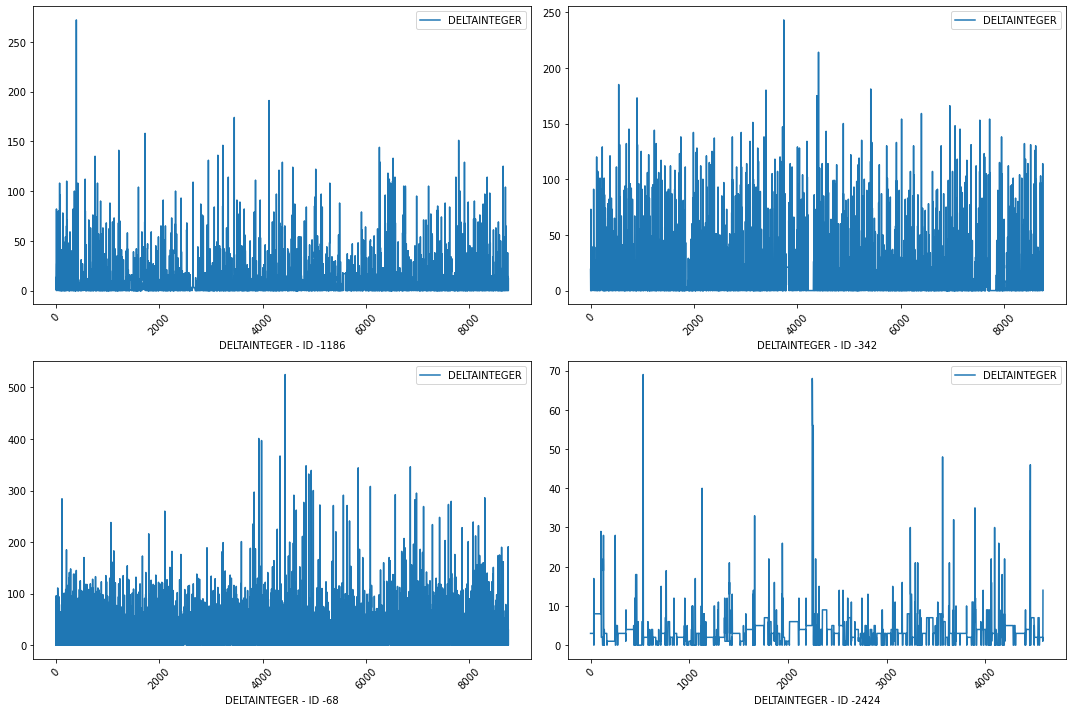

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
data1.DELTAINTEGER.plot(legend = True) 
plt.xticks(rotation=45)
plt.xlabel(f'DELTAINTEGER - ID -{int(data1.ID.unique())}') 

plt.subplot(2,2,2)
data2.DELTAINTEGER.plot(legend = True) 
plt.xticks(rotation=45)
plt.xlabel(f'DELTAINTEGER - ID -{int(data2.ID.unique())}')

plt.subplot(2,2,3)
data3.DELTAINTEGER.plot(legend = True) 
plt.xticks(rotation=45)
plt.xlabel(f'DELTAINTEGER - ID -{int(data3.ID.unique())}')


plt.subplot(2,2,4)
data4.DELTAINTEGER.plot(legend = True) 
plt.xticks(rotation=45)
plt.xlabel(f'DELTAINTEGER - ID -{int(data4.ID.unique())}') 
 

plt.tight_layout()
plt.show()

*En este grafico no es tan evidente una tendencia marcada, pero si que se observa una especie de estacionariedad en funcion del tiempo. Esto es importante para determinar el uso del modelo de series de tiempo.*<br>
*En el ID 1186, se presenta un maximo cerca al indice 100 aproximadamente.*<br>
*En el ID 342, se presentaq un maximo cercano a 4000 aproximadamente.*<br>
*En el ID 68, se presenta un maximo cercano a 4000 aproximadamente.*<br>
*En el ID 2424, se presentan dos maximos cercanos a 500 y a 2400.*<br> 


*En el siguiente grafico se pretende observar el comportamiento de la parte decimal del consumo de agua.*

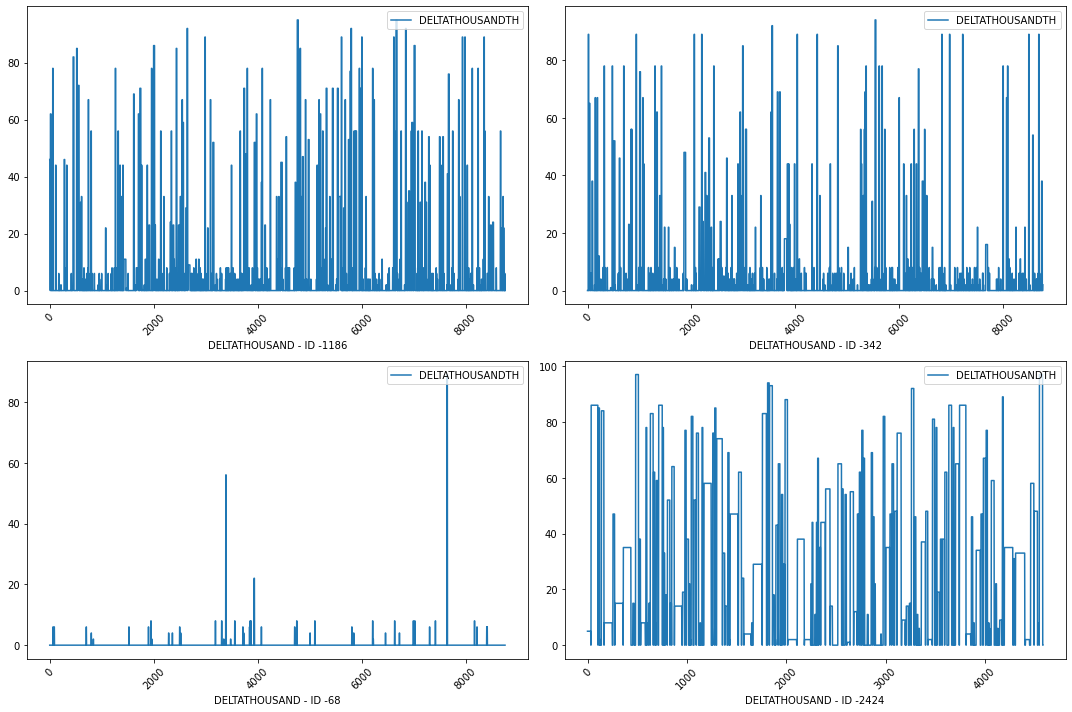

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
data1.DELTATHOUSANDTH.plot(legend = True) 
plt.xticks(rotation=45)
plt.xlabel(f'DELTATHOUSAND - ID -{int(data1.ID.unique())}')
plt.legend(loc='upper right')  

plt.subplot(2,2,2)
data2.DELTATHOUSANDTH.plot(legend = True) 
plt.xticks(rotation=45)
plt.xlabel(f'DELTATHOUSAND - ID -{int(data2.ID.unique())}')
plt.legend(loc='upper right') 

plt.subplot(2,2,3)
data3.DELTATHOUSANDTH.plot(legend = True) 
plt.xticks(rotation=45)
plt.xlabel(f'DELTATHOUSAND - ID -{int(data3.ID.unique())}')
plt.legend(loc='upper right') 

plt.subplot(2,2,4)
data4.DELTATHOUSANDTH.plot(legend = True)  
plt.xticks(rotation=45)
plt.xlabel(f'DELTATHOUSAND - ID -{int(data4.ID.unique())}') 
plt.legend(loc='upper right')  

plt.tight_layout()
plt.show()

*En este caso no hay una interpretacion para esto, pero se puede identificar la variacion en el tiempo para los IDs, y como aumentan en un tiempo determinado de manera abrupta, ejemplo: el ID 68.* 

In [6]:
data1_ = data1.copy()
data2_ = data2.copy()
data3_ = data3.copy() 
data4_ = data4.copy()

*Dado el comportamiento de la variable DELTAINTEGER y DELTATHOUSANDTH, crearemos una variable que sume las dos columnas y analizemos como se comportan de manera conjunta.*

In [7]:
    def deltainteger(df): 

        """
        Esta funcion crea una nueva variable deltainteger que es la suma de DELTAINTEGER + DELTATHOUSAND
        Cambia a datetime la columna SAMPLETIME
        """
        
        df["SAMPLETIME"] = pd.to_datetime(df["SAMPLETIME"])
        df = df.replace(np.nan,0) 
        df['DELTATHOUSANDTH'] = df['DELTATHOUSANDTH'].astype(float).astype(int)
        df.sort_values(by="SAMPLETIME", inplace=True)
        df.reset_index(inplace=True, drop=True)
        df['DELTAINTEGER'] = df['DELTAINTEGER'].astype(str)
        df['DELTATHOUSANDTH'] = df['DELTATHOUSANDTH'].astype(str)
        df['deltainteger'] = df['DELTAINTEGER'] + '.' + df['DELTATHOUSANDTH'] 
        df['deltainteger'] = df['deltainteger'].astype(float)  
        df.drop(df.columns[[2,3,4,5]], axis = 1, inplace =True) 

        return df
   

In [8]:
group1_sum = deltainteger(data1_)
group2_sum = deltainteger(data2_) 
group3_sum = deltainteger(data3_)
group4_sum = deltainteger(data4_)

## Analisis organizando las fechas por dias 

### Suma por cada dia

*En este punto analizaremos la serie de tiempo, organizando las fechas por la suma de las horas que forman un dia.*

In [9]:
def group_day(data, column_name, frec):
    
    """
    Esta funcion agrupa por serie de tiempo en dias para obtener la suma o media de deltainteger
    """   
    data = data.groupby([pd.Grouper(key=column_name, freq=frec), "ID"]).sum() 
    data = data.reset_index()
    data["SAMPLETIME"] = pd.to_datetime(data["SAMPLETIME"]) 
    data = data.set_index(column_name)
    
    return data 

In [10]:
group1_sum = group_day(group1_sum, "SAMPLETIME", "1D")  
group2_sum = group_day(group2_sum, "SAMPLETIME", "1D")    
group3_sum = group_day(group3_sum, "SAMPLETIME", "1D")  
group4_sum = group_day(group4_sum, "SAMPLETIME", "1D")  

*Graficamos los resultados de los IDs, agrupando por dia de la semana*

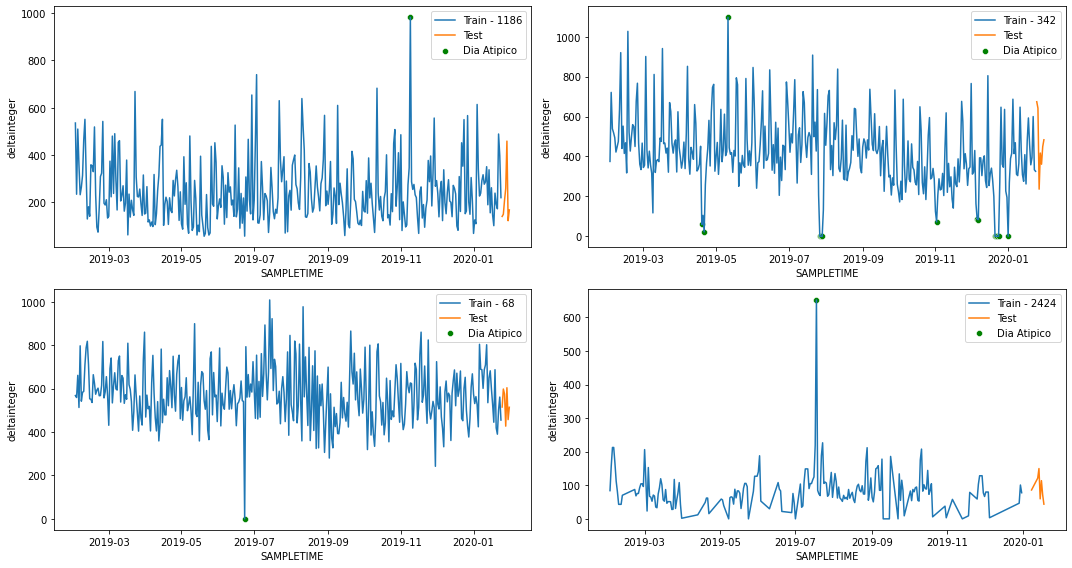

In [27]:
plt.figure(figsize=(15,8))  
 
plt.subplot(2,2,1)
train = group1_sum[:-7]
test = group1_sum[-7:]
meann = train.deltainteger.mean()
outl = train[train["deltainteger"] > 800] 
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(group1_sum.ID.unique())}")  
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")  

plt.subplot(2,2,2)
train = group2_sum[:-7]
test = group2_sum[-7:] 
outl = train[(train["deltainteger"] > 1050) | (train["deltainteger"] < 100)]       
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(group2_sum.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")  

plt.subplot(2,2,3) 
train = group3_sum[:-7]
test = group3_sum[-7:] 
outl = train[(train["deltainteger"] < 100)]        
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(group3_sum.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")
plt.legend(loc='upper right') 

plt.subplot(2,2,4)
train = group4_sum[:-7]
test = group4_sum[-7:]  
outl = train[(train["deltainteger"] > 400)]         
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(group4_sum.ID.unique())}")  
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")
plt.legend(loc='upper right') 


plt.tight_layout()
plt.show()

*En este caso, se observa un mejor comportamiento en la serie de tiempo. Sin tener en cuenta los valores tan altos en algunos puntos, se puede observar que el consumo diario permanece estable.*<br>
* *Para el ID 1186, se detecta un dia atipico cercano a 2019 y mes 11, que puede coincidir con el dia de todos los santos, feriado en toda españa.*<br> 
* *Para el ID 342, entre el 2019-05 se observa una variacion en los picos, de manera que decrece y aumenta en un corto periodo de tiempo. Nuevamente, en estas fechas se encuentra el dia del trabajador.*<br>
* *En el ID 68, entre finales de junio del 2019- se presenta una variacion en el pico de manera negativa. Este tipo de comportamientos pueden darse por varios motivos, pero podemos pensar que la persona no estuve dentro de esos dias, debido a el 24 de junio (San Juan), dia feriado. O por otro lado, hubo alguna falla en el contador.*<br> 
* *En el ID 2424, se detecta un dia atipico entre julio y agosto del 2019.Posiblemente por ser feriado 15 de agosto del 2019.Hubo un aumento en el consumo de agua.*  


### Media por cada dia

*Existe otra manera de detectar cambios en el consumo de agua. Este efecto podria verse en el calculo de la media de consumo por dia*

In [11]:
group1 = deltainteger(data1_)
group2 = deltainteger(data2_) 
group3 = deltainteger(data3_)
group4 = deltainteger(data4_)

*Agrupamos por media del dia de consumo de agua, para cada Id*

In [12]:
def group(data, column_name, frec):
    
    """
    Esta funcion agrupa por serie de tiempo en dias para obtener la suma o media de deltainteger
    """   
    data = data.groupby([pd.Grouper(key=column_name, freq=frec), "ID"]).mean()
    data = data.reset_index()
    data["SAMPLETIME"] = pd.to_datetime(data["SAMPLETIME"]) 
    data = data.set_index(column_name)
    
    return data 

In [13]:
group1 = group(group1, "SAMPLETIME", "1D")  
group2 = group(group2, "SAMPLETIME", "1D")   
group3 = group(group3, "SAMPLETIME", "1D")  
group4 = group(group4, "SAMPLETIME", "1D")  

*Graficamos para determinar algunos dias atipicos que se puedan presentar*

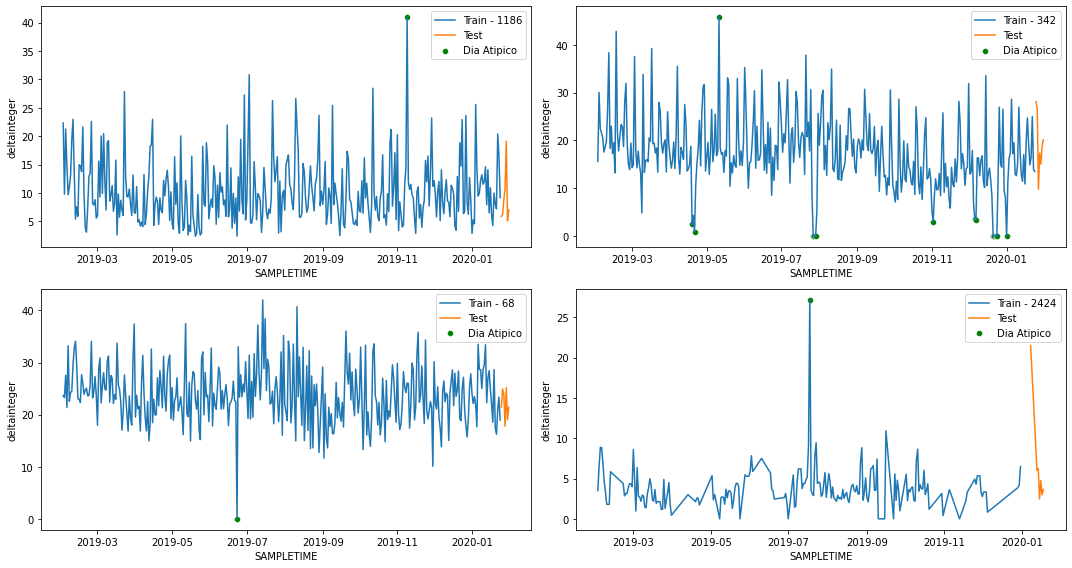

In [32]:
plt.figure(figsize=(15,8))  

plt.subplot(2,2,1)
train = group1[:-7]
test = group1[-7:]
outl = train[train["deltainteger"] > 35] 
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(group1.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")  

plt.subplot(2,2,2)
train = group2[:-7]
test = group2[-7:] 
outl = train[(train["deltainteger"] > 45) | (train["deltainteger"] < 4)]       
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(group2.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")  

plt.subplot(2,2,3) 
train = group3[:-7]
test = group3[-7:] 
outl = train[(train["deltainteger"] < 4)]        
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(group3.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")
plt.legend(loc='upper right') 

plt.subplot(2,2,4)
train = group4[:-7]
test = group4[-7:]  
outl = train[(train["deltainteger"] > 20)]         
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(group4.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")
plt.legend(loc='upper right') 


plt.tight_layout()
plt.show()

*Evidentemente los picos se marcan nuevamente, y mejor en algunos casos, ya que corroboran lo mencionado anteriormente*
* *Para el ID 342, la grafica muestra variaciones en los dias feriados donde posiblemente paso algo en particular*
* *Para el ID 68, la disminucion sigue estando presente*
* *Para el ID 2424, el maximo sigue representando un valor muy alto*

### Analisis de tiempo de los primeros dos meses respecto a la suma por dia

Para entender mejor el comportamiento de nuestra serie, se realiza una grafica en el tiempo en un rango de 2 meses. 

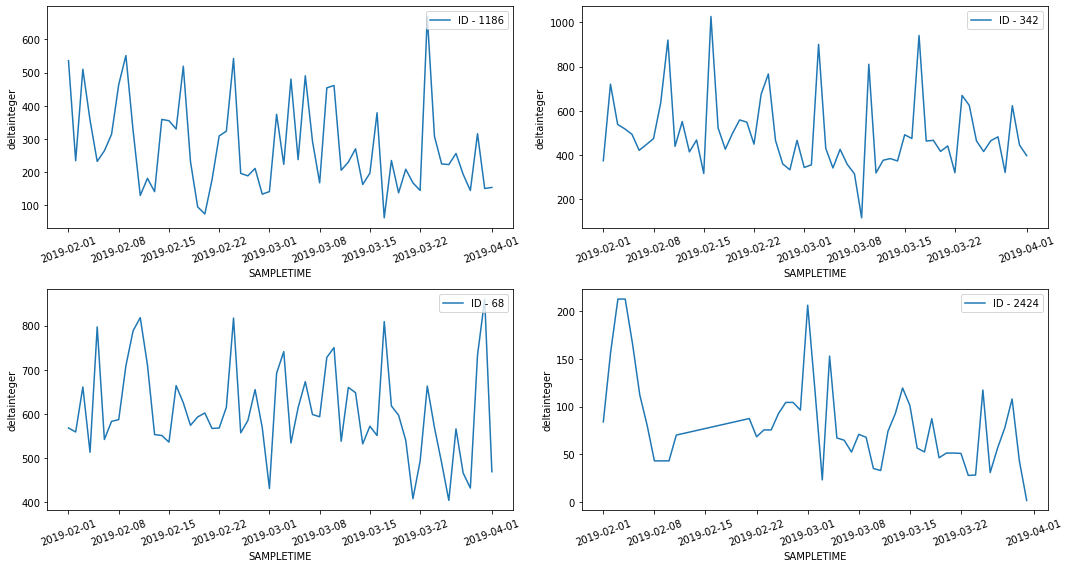

In [37]:
plt.figure(figsize=(15,8))  

plt.subplot(2,2,1)
d =group1_sum[(group1_sum.index >= "2019-02-01") & (group1_sum.index <= "2019-04-01")]     
sns.lineplot(x=d.index, y= d["deltainteger"], label=f"ID - {int(group1_sum.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,2) 

d =group2_sum[(group2_sum.index >= "2019-02-01") & (group2_sum.index <= "2019-04-01")] 
sns.lineplot(x=d.index, y= d["deltainteger"], label=f"ID - {int(group2_sum.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,3) 
d =group3_sum[(group3_sum.index >= "2019-02-01") & (group3_sum.index <= "2019-04-01")] 
sns.lineplot(x=d.index, y= d["deltainteger"], label=f"ID - {int(group3_sum.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,4)  
d =group4_sum[(group4_sum.index >= "2019-02-01") & (group4_sum.index <= "2019-04-01")]  
sns.lineplot(x=d.index, y= d["deltainteger"], label=f"ID - {int(group4_sum.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 


plt.tight_layout()
plt.show()

*Se puede observar en los 4 IDs que las series temporales tienden a ser estacionarias. Este tipo de analisis requiere una investigacion mas profunda que se plantea mas adelante a detalle.*<br>
*En general las series del dataset, tienden al mismo comportamiento, con algunos picos eventualmente que se presentan, debido a algunas variaciones en el consumo de agua que por lo general tienen una explicacion logica, y otras con errores en la adquisicion de datos o errores del contador.* 

### Analisis de tiempo de los primeros dos meses respecto a la media por dia

*Para determinar una tendencia sera necesario realizar el mismo analisis anterior pero con el consumo diario respecto a la media.*

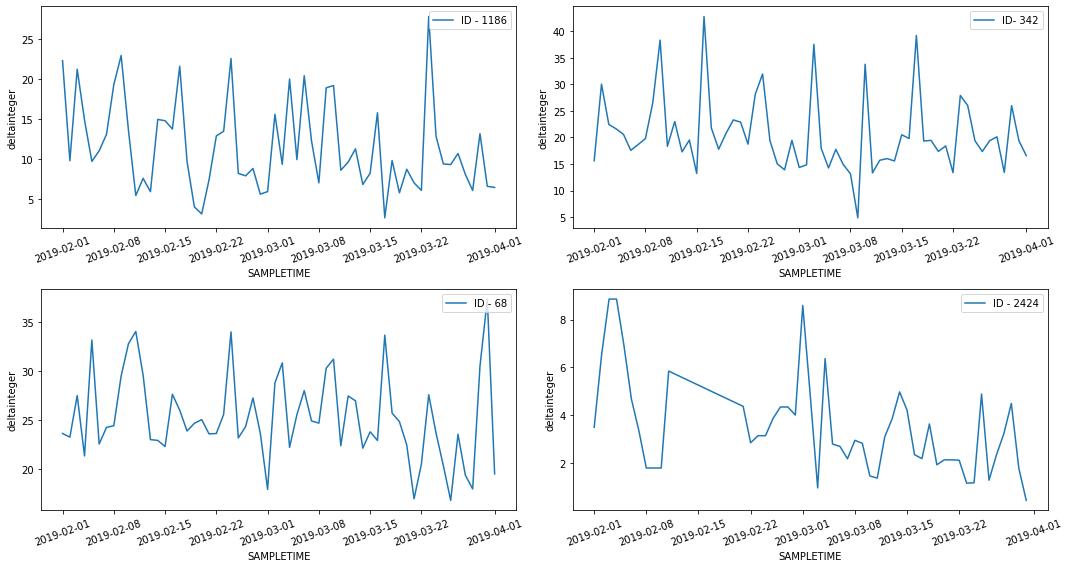

In [36]:
plt.figure(figsize=(15,8))  


plt.subplot(2,2,1)
d =group1[(group1.index >= "2019-02-01") & (group1.index <= "2019-04-01")]   
sns.lineplot(x=d.index, y= d["deltainteger"], label=f"ID - {int(group1.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,2) 

d =group2[(group2.index >= "2019-02-01") & (group2.index <= "2019-04-01")]
sns.lineplot(x=d.index, y= d["deltainteger"], label=f"ID- {int(group2.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,3) 
d =group3[(group3.index >= "2019-02-01") & (group3.index <= "2019-04-01")]
sns.lineplot(x=d.index, y= d["deltainteger"], label=f"ID - {int(group3.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,4)  
d =group4[(group4.index >= "2019-02-01") & (group4.index <= "2019-04-01")]
sns.lineplot(x=d.index, y= d["deltainteger"], label=f"ID - {int(group4.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.tight_layout()
plt.show()

*Es en grafico de las medias, es posible analizar la variacion que tienen en funcion del tiempo. La serie se mueve respecto a la media con algunas variaciones que son normales, debido a la procedencia de los datos, que se basan en el consumo de agua. Claramente estos comportamientos estan influidos por otras variables externas que no estan implicitas en el comportamiento (variables exogenas).* 

## Analisis organizando las fechas por semanas 

*Debido a la prediccion semanal a realizar, es necesario entender como se comporta la serie en funcion de un cambio en el periodo del tiempo. Esto nos ayudara a determinar que estrategias seguir para que el modelo interprete mejor la serie temporal.* 

In [14]:
week_group1_sum = deltainteger(data1_) 
week_group2_sum = deltainteger(data2_) 
week_group3_sum = deltainteger(data3_)  
week_group4_sum = deltainteger(data4_) 

### Suma por cada semana

*Se realizara la suma por cada semana para determinar un comportamiento en la serie de tiempo. Esto se traduce en que cada semana sera la suma de los 7 dias anteriores a la fecha que aparece en el dataset.* 

In [15]:
week_group1_sum = group_day(week_group1_sum, "SAMPLETIME", "1W")  
week_group2_sum = group_day(week_group2_sum, "SAMPLETIME", "1W")    
week_group3_sum = group_day(week_group3_sum, "SAMPLETIME", "1W")  
week_group4_sum = group_day(week_group4_sum, "SAMPLETIME", "1W")  

*Graficamos los resultados de la nueva serie de tiempo* 

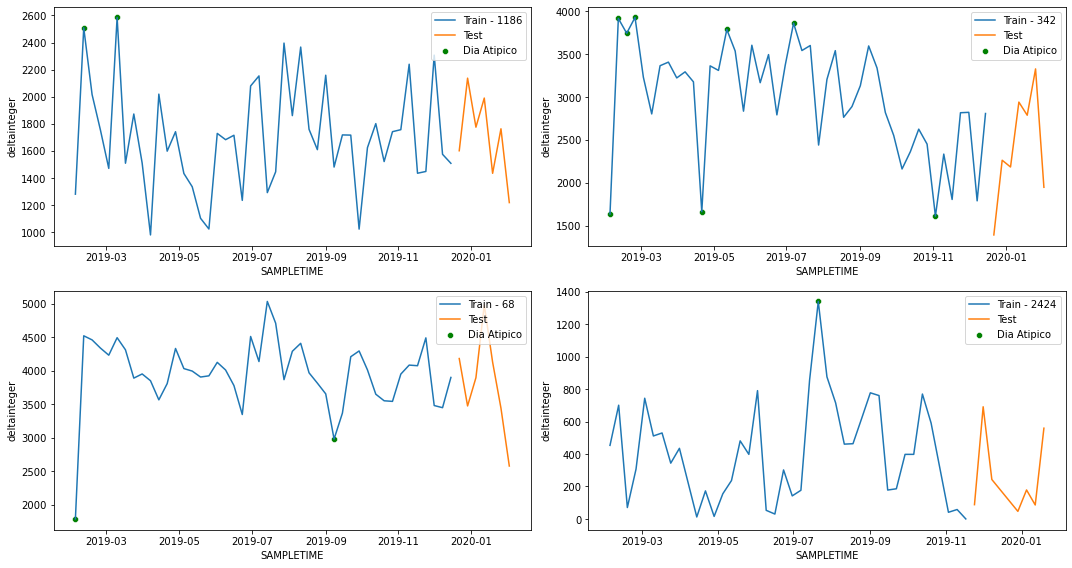

In [17]:
plt.figure(figsize=(15,8))  
 
plt.subplot(2,2,1)
train = week_group1_sum[:-7] 
test = week_group1_sum[-7:] 
outl = train[train["deltainteger"] > 2500] 
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(week_group1_sum.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")  
plt.legend(loc='upper right') 

plt.subplot(2,2,2)
train = week_group2_sum[:-7]
test = week_group2_sum[-7:] 
outl = train[(train["deltainteger"] > 3700) | (train["deltainteger"] < 1700)]       
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(week_group2_sum.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")  

plt.subplot(2,2,3) 
train = week_group3_sum[:-7]
test = week_group3_sum[-7:] 
outl = train[(train["deltainteger"] < 3000)]        
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(week_group3_sum.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")
plt.legend(loc='upper right') 

plt.subplot(2,2,4)
train = week_group4_sum[:-7]
test = week_group4_sum[-7:]  
outl = train[(train["deltainteger"] > 1000)]         
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(week_group4_sum.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")
plt.legend(loc='upper right') 


plt.tight_layout()
plt.show()

*Para el ID 1186, es posible identificar dias atipicos diferentes a la serie por dias. El maximo cercano a la fecha 04/2019 Podria coincidir con el dia festivo del 19 de abril - Viernes santo. En comparacion con las demas semanas no es un aumento muy grande pero se podria explicar el por que del pico en ese punto.*<br>
*Para el ID 342, se observan un comportamiento similar a la suma por dias, que se basa en la disminucion de deltaintenger para las fechas del 05/2019 y el 11/2019. Que podrian relacionarse con el festivo del 19 de abril. por otro lado en la fecha del 11/2019 la disminucion se podria explicar por el festivo del 1 de noviembre (Dia de todos los santos).*<br>
*Para el ID 68, se encuentra una serie que no presenta maximos muy marcados durante el tiempo.*<br>
*Para el ID 2424,  Observamos el mismo maximo que aparece en la suma por dias. Podria explicarse al dia festivo del 15 de agosto del 2019.*<br>
*Algo que llama la atencion en estos 4 IDs es que por lo general a principio de año, todos empiecen con valores muy bajos, que aumentan despues de febrero.* 



### Media por cada semana

*Con el objetivo de analizar algun cambio en el tiempo por semana, se realiza una agrupacion por media por cada semana.*

In [18]:
week_group1 = deltainteger(data1_)
week_group2 = deltainteger(data2_) 
week_group3 = deltainteger(data3_)
week_group4 = deltainteger(data4_)

In [19]:
week_group1 = group(week_group1, "SAMPLETIME", "1W")  
week_group2 = group(week_group2, "SAMPLETIME", "1W")   
week_group3 = group(week_group3, "SAMPLETIME", "1W")  
week_group4 = group(week_group4, "SAMPLETIME", "1W")  

*Se grafican los resultados de la agrupacion* 

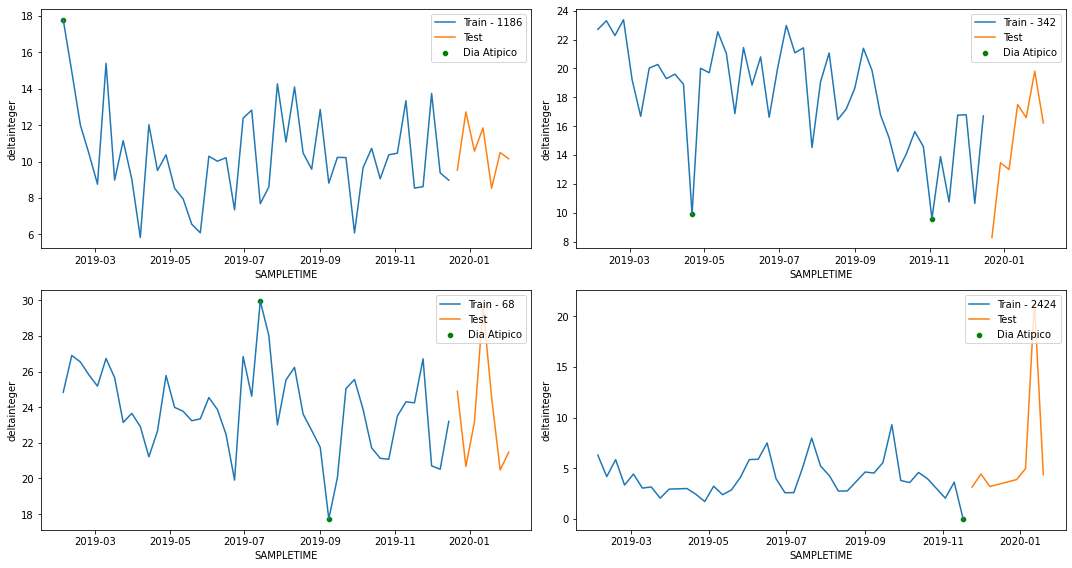

In [21]:
plt.figure(figsize=(15,8))  

plt.subplot(2,2,1)
train = week_group1[:-7]
test = week_group1[-7:]
outl = train[train["deltainteger"] > 16] 
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(week_group1.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")  

plt.subplot(2,2,2)
train = week_group2[:-7]
test = week_group2[-7:] 
outl = train[(train["deltainteger"] < 10)]       
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(week_group2.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")  

plt.subplot(2,2,3) 
train = week_group3[:-7]
test = week_group3[-7:] 
outl = train[(train["deltainteger"] > 29) | (train["deltainteger"] < 19)]         
sns.lineplot(x=train.index, y= train["deltainteger"], label= f"Train - {int(week_group3.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")
plt.legend(loc='upper right') 

plt.subplot(2,2,4)
train = week_group4[:-7]
test = week_group4[-7:]  
outl = train[(train["deltainteger"] < 1)]         
sns.lineplot(x=train.index, y= train["deltainteger"], label=f"Train - {int(week_group4.ID.unique())}") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test") 
sns.scatterplot(x=outl.index, y=outl["deltainteger"], color="green", label="Dia Atipico")
plt.legend(loc='upper right') 


plt.tight_layout()
plt.show()

*En el grafico de la media para el ID 1186, se observa como cambia un poco el comportamiento en el maximo. En este caso elpico se presenta al inicio del año. Esto representa una variacion muy grande en deltainteger*<br> 
*En el ID 342, se observa el mismo cambio en deltainteger a un valor menor que la media.<br>*
*En el ID 68, se observan los mismos maximos en comparacion a las graficas anteriores de la suma por dias y la suma por semanas.*<br>
*En el grafico de ID 2424, es posible determinar 3 puntos mas altos en la serie de tiempo. Donde la posibilidad de que sean afectados por un factor externo es alta.*

### Analisis de tiempo de los primeros seis meses respecto a la suma por semana 

*Para seguir el analisis anterior, es necesario observar el comportamiento de la serie de tiempo en un rango menor.*

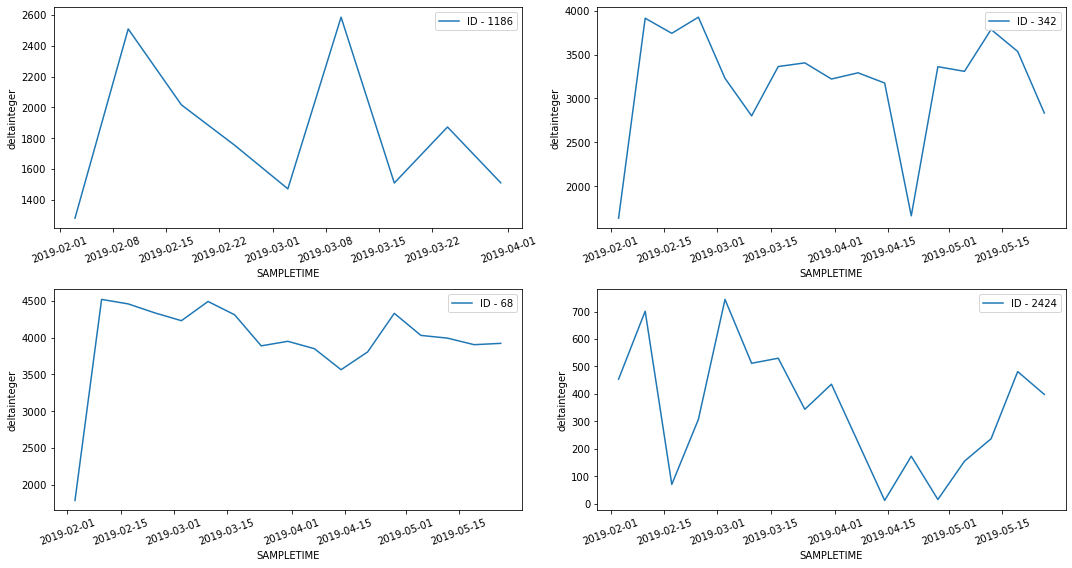

In [25]:
plt.figure(figsize=(15,8))  

plt.subplot(2,2,1)
d =week_group1_sum[(week_group1_sum.index >= "2019-02-01") & (week_group1_sum.index <= "2019-04-01")]     
sns.lineplot(x=d.index, y= d["deltainteger"],label=f"ID - {int(week_group1_sum.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 


plt.subplot(2,2,2) 

d =week_group2_sum[(week_group2_sum.index >= "2019-02-01") & (week_group2_sum.index <= "2019-06-01")] 
sns.lineplot(x=d.index, y= d["deltainteger"],label=f"ID - {int(week_group2_sum.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 


plt.subplot(2,2,3) 
d =week_group3_sum[(week_group3_sum.index >= "2019-02-01") & (week_group3_sum.index <= "2019-06-01")] 
sns.lineplot(x=d.index, y= d["deltainteger"],label=f"ID - {int(week_group3_sum.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 


plt.subplot(2,2,4)  
d =week_group4_sum[(week_group4_sum.index >= "2019-02-01") & (week_group4_sum.index <= "2019-06-01")]   
sns.lineplot(x=d.index, y= d["deltainteger"],label=f"ID - {int(week_group4_sum.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 


plt.tight_layout()
plt.show()

*En general lo que se puede especificar en los 4 IDs es que en varios peridiosos de semana, existen aumentos y disminuciones en un corto periodo de tiempo. Este tipo de variaciones seran un poco mas complejas de predecir debido a la cantida de datos que se obtiene.* No se ve una tendencia estacionaria para este caso en especifico. Lo cual indica que la ventana de tiempo, influira mucho en el resultado.*

### Analisis de tiempo de los primeros seis meses respecto a la media por semana 

*Para puntualizar un cambio en deltainteger, se realiza un analisis de los primeros seis meses respecto a la media por semana.*

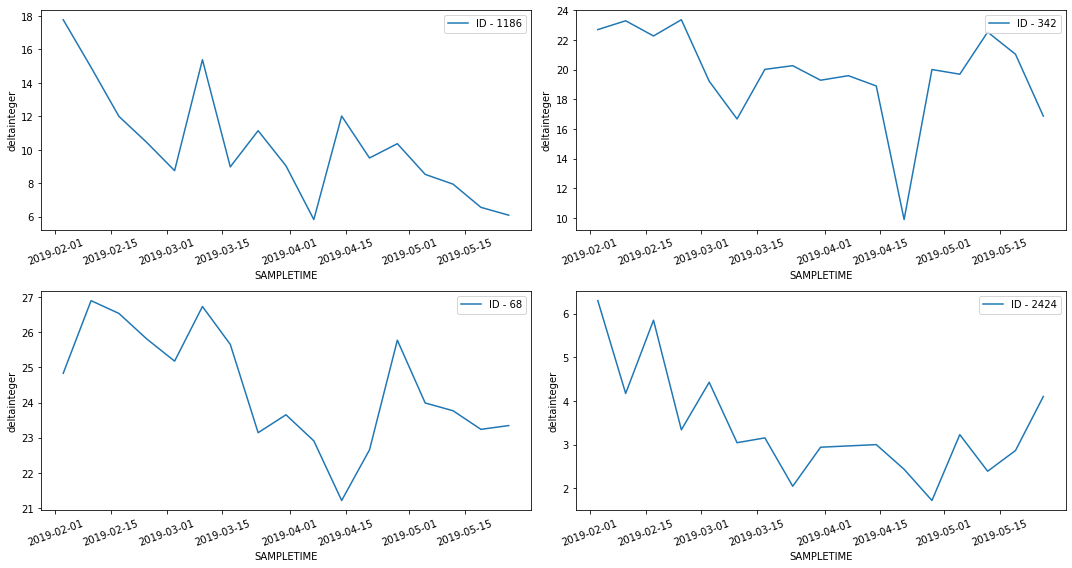

In [26]:
plt.figure(figsize=(15,8))  

plt.subplot(2,2,1)
d =week_group1[(week_group1.index >= "2019-02-01") & (week_group1.index <= "2019-06-01")]   
sns.lineplot(x=d.index, y= d["deltainteger"],label = f"ID - {int(week_group1.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,2) 

d =week_group2[(week_group2.index >= "2019-02-01") & (week_group2.index <= "2019-06-01")]
sns.lineplot(x=d.index, y= d["deltainteger"],label = f"ID - {int(week_group2.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,3) 
d =week_group3[(week_group3.index >= "2019-02-01") & (week_group3.index <= "2019-06-01")]
sns.lineplot(x=d.index, y= d["deltainteger"],label = f"ID - {int(week_group3.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 

plt.subplot(2,2,4)  
d =week_group4[(week_group4.index >= "2019-02-01") & (week_group4.index <= "2019-06-01")]
sns.lineplot(x=d.index, y= d["deltainteger"], label = f"ID - {int(week_group4.ID.unique())}") 
plt.xticks(rotation = 20)
plt.legend(loc='upper right') 


plt.tight_layout()
plt.show()

*En el grafico para los 4 IDs, se evidencia nuevaente el comportamiento marcado para la media por semana. Los picos siguen marcados, pero es posible notar mas variaciones en la serie de tiempo.* 

# Descomposicion de la serie

*Parte del analisis es entender el tipo de serie que lidiamos para la solucion del problema. 
En este caso analizaremos el ID 1186, con el fin de comparara lgunos resultados de valores predichos y la metrica de evaluacion.*

La descomposicion de la serie de tiempo tiene 3 componenetes:

* Tendencia que representa la evolucion de la serie en el tiempo. 
* Estacionalidad: Recoge comportamientos de tipó regular y repetitivo que se dan a lo largo de un periodo de tiempo, las cuales son producidos por factores tales como, vacaciones,fiestas, semanas. Un proceso estacionario se describe como una secuencia de datos o valores que no presentan cambio sistemático en la media ni en la varianza. En caso de cambios en la media y/o varianza la serie es no estacionario o estable.
* Ruido: que puede ser aleatorio recoge los pequeños efectos erraticos, como resultado de hechos no previsibles.

ID - 1186


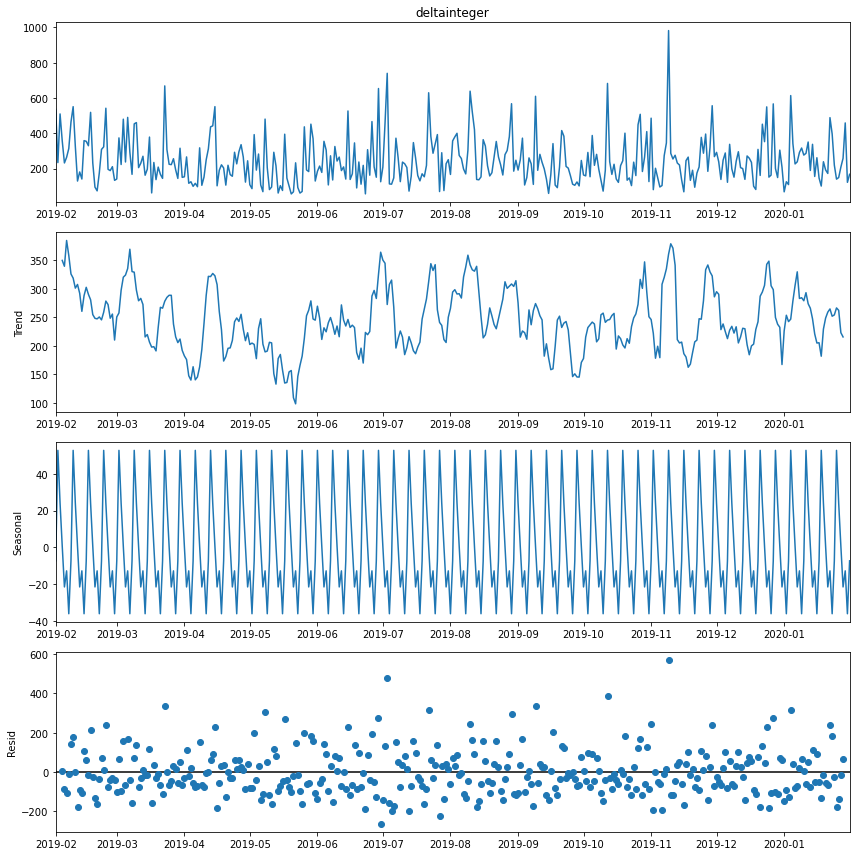

In [38]:
result = seasonal_decompose(group1_sum.deltainteger, model="additive") 
print(f"ID - {int(data1.ID.unique())}") 
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

1- Tendencia: <br>
Es posible observar un comportamiento repetitivo en la serie de tiempo, de manera estacional. Cada cierto periodo de tiempo se repite un ciclo y se comporta como una funcion senusoidal. 

2- Estacionalidad: <br>
Al considerar la periodicidad diaria, se observa que la estacionalidad mensual la sepra como si fuese la tendencia y en la estacionalidad detecta la componmente periodica de la serie, que se repite aparentemente cada semana. 

3- Ruido: <br>




In [39]:
train = group1_sum.iloc[:-7]
test = group1_sum.iloc[-7:]

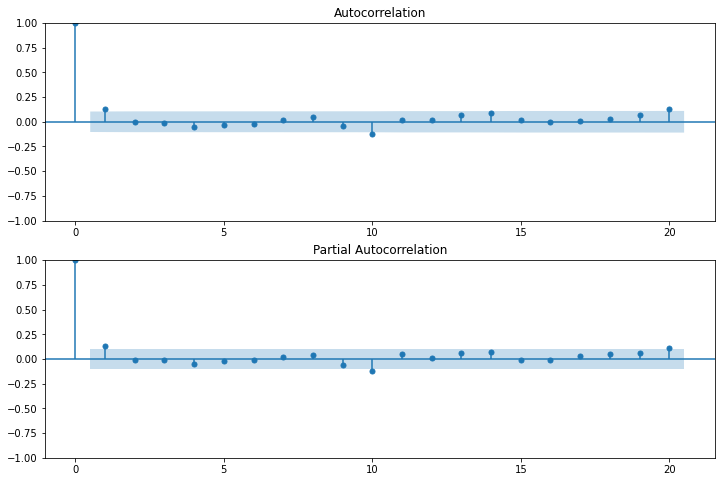

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['deltainteger'],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['deltainteger'],lags=20,ax=ax2) 

*En el grafico de autocorrelacion se observa que la serie tiene un AFC significativo en el lag 1. Hay presencia de algunos AFC marginalmente significativos en lags mas altos. Podria presentarse un modelo autoregresivo.*<br>
*El grafico PAFC me determina la media movil, que se presenta en el valor de 1.*

## SARIMAX

*EL modelo SARIMAX, es una extension del modelo ARIMA, que significa media movil integrada, autorregresiva estacional con factores exogenos. Por lo general se aplica el modelo SARIMAX cuando se tinen series temporales que presentan ciclos estacionales.*

In [41]:
from pmdarima.arima import auto_arima 

*Realizaremos un auto_arima para probar y determinar el mejor hiperparametro de los valores P,I,q, y la componente estacional, basado en los siguientes valores que se presentan a continuacion: .*

In [42]:
decomposition = auto_arima(train.deltainteger, start_p = 1, start_q = 1, max_p = 3, max_p_q = 3, m=12, seasonal = True,d =1,D=1, trace =True,
                           error_action = 'ignore', surpress_warning= True, stepwise =True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4812.834, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4655.473, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4734.036, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4617.165, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4685.271, Time=0.20 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4579.328, Time=0.39 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=4625.668, Time=0.18 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.40 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4567.929, Time=0.40 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=4619.3

In [43]:
decomposition.aic() 

4567.928678175742

*El mejor modelo es el de order (3,1,0) y seanol_order (2,1,0,12) con un valor de AIC = 4567.92*

***Implementamos el modelo para el entrenamiento segun los hiperparametros encontrados***

In [44]:
model = sm.tsa.statespace.SARIMAX(train['deltainteger'],order=(3,1,0), seasonal_order = (2,1,0,12),
                                        enforce_stationarity =False,
                                        enforce_invertibility = False) 
model_fit = model.fit()
print(model_fit.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                       deltainteger   No. Observations:                  358
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2089.437
Date:                            Sat, 19 Mar 2022   AIC                           4190.873
Time:                                    13:30:26   BIC                           4213.445
Sample:                                02-01-2019   HQIC                          4199.889
                                     - 01-24-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6721      0.054    -12.453      0.000      -0.778      -0.566
ar.L2         -0.4823      0.058   

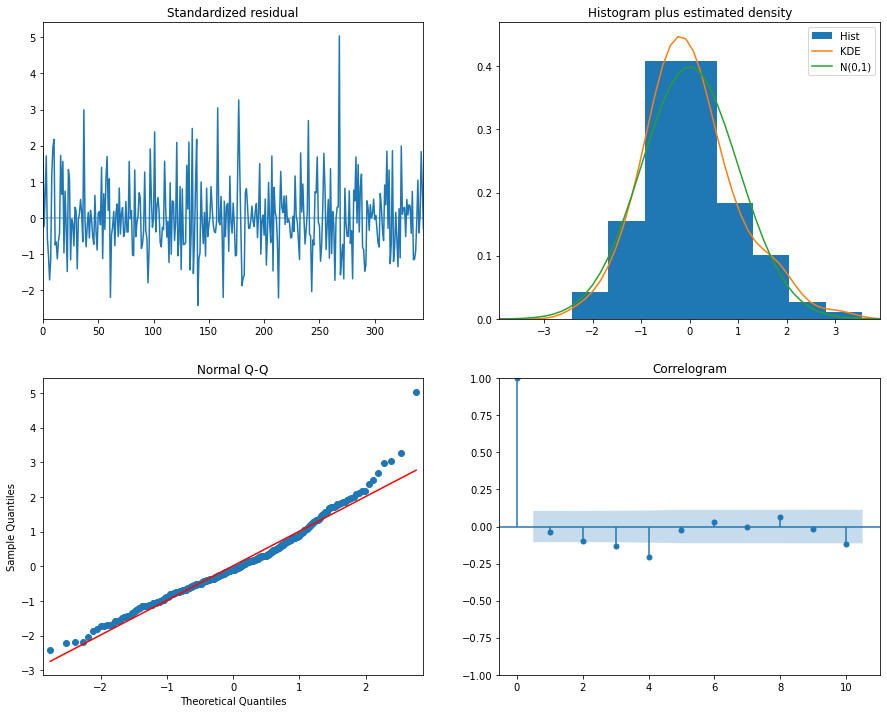

In [45]:
decomposition.plot_diagnostics(figsize=(15,12))
plt.show() 

*En el grafico de standarized residual se evidencia un comportamiento horizontal, que no se desvia mucho del cero, ademas, se puede observar que mantiene constante, tanto en la parte superior e inferior, a mayor valores en el eje X.*<br>
*En el grafico de Normal Q-Q indica que los residuos no se alejan de forma significativa del modelo normal.*

In [46]:
pred_uc = model_fit.get_forecast(steps = 7) 
pred_ci = pred_uc.conf_int() 

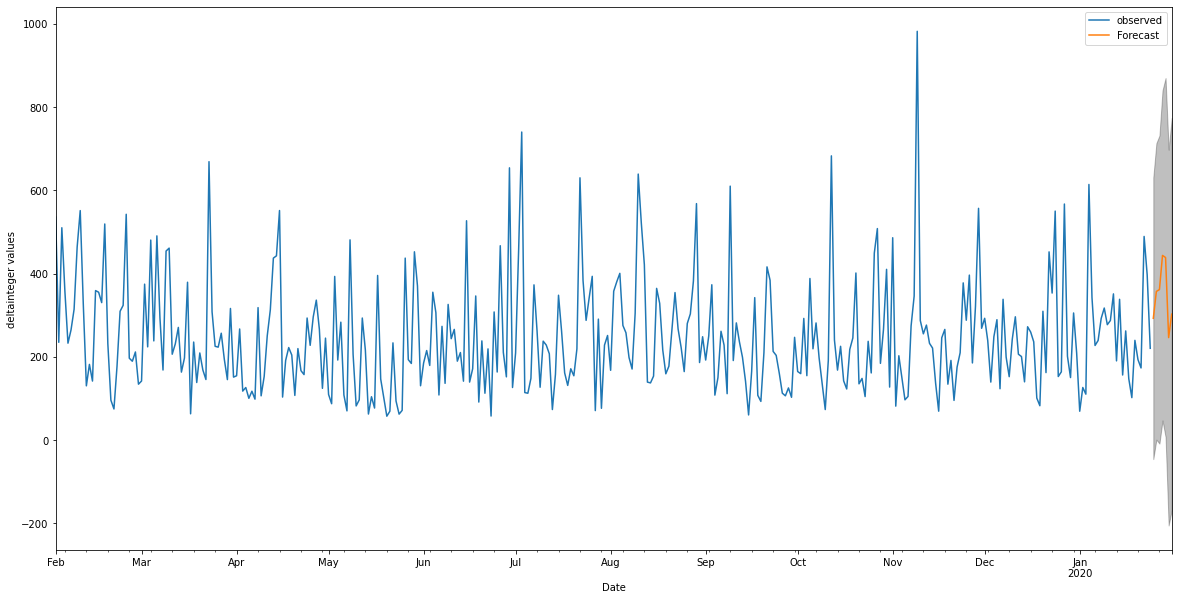

In [47]:
ax = train.deltainteger.plot(label = 'observed', figsize = (20,10))
pred_uc.predicted_mean.plot(ax=ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color = 'k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('deltainteger values') 

plt.legend()
plt.show() 

In [48]:
pred_ci.round(2) 

,lower deltainteger,upper deltainteger
2020-01-25,-46.12,630.89
2020-01-26,0.71,713.20
2020-01-27,-8.85,731.53
2020-01-28,46.87,840.08
2020-01-29,7.04,869.83
2020-01-30,-205.69,697.47
2020-01-31,-169.13,773.76


### prediccion

In [49]:
forecast = model_fit.forecast(14)
forecast.round(2) 

2020-01-25    292.38
2020-01-26    356.96
2020-01-27    361.34
2020-01-28    443.47
2020-01-29    438.43
2020-01-30    245.89
2020-01-31    302.32
2020-02-01    450.66
2020-02-02    306.67
2020-02-03    409.54
2020-02-04    433.11
2020-02-05    334.66
2020-02-06    278.92
2020-02-07    356.51
Freq: D, Name: predicted_mean, dtype: float64

In [50]:
forecast.iloc[-7:] 

2020-02-01    450.657971
2020-02-02    306.674463
2020-02-03    409.544630
2020-02-04    433.111689
2020-02-05    334.658413
2020-02-06    278.917842
2020-02-07    356.508038
Freq: D, Name: predicted_mean, dtype: float64

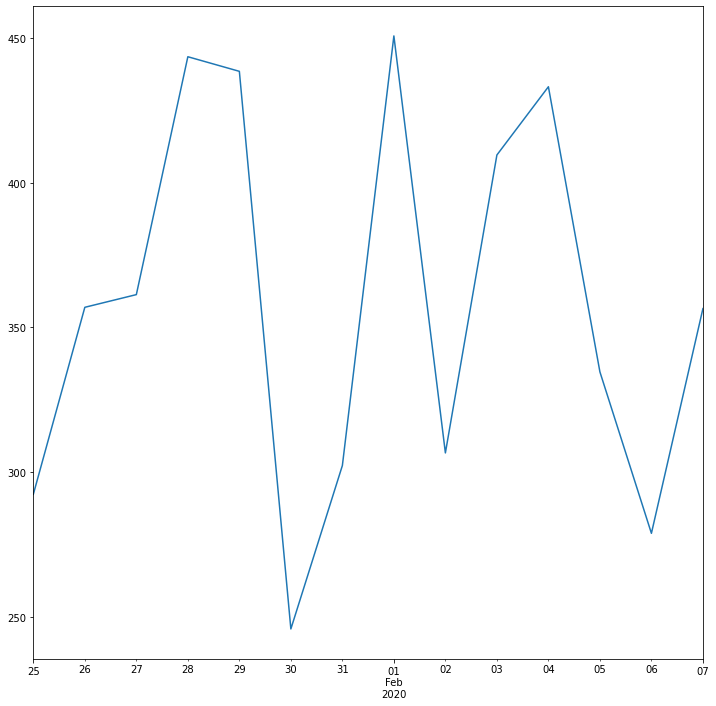

In [51]:
forecast.plot()
rcParams['figure.figsize'] = 13,6

### Metrica RMSE 

In [52]:
metrica = sqrt(mean_squared_error(test[['deltainteger']], forecast.iloc[-7:]))
metrica 

195.10161386411465

## Random Forest 

In [53]:
random_forest = group1_sum.copy()
train = random_forest[:-7]
test = random_forest[-7:]
train['fecha_numeros'] = train.index.map(datetime.toordinal)  
test['fecha_numeros'] = test.index.map(datetime.toordinal)  

In [54]:
rf =  RandomForestRegressor()
param_dist = {'n_estimators': np.arange(80,100),
              'max_features': ['auto'],
              'criterion': ['mse'],
             }


In [55]:
model = RandomizedSearchCV(rf, param_dist,n_iter=8, random_state=42, cv=5,scoring='neg_root_mean_squared_error')

model_fit = model.fit(train.fecha_numeros.values.reshape(-1,1), train.deltainteger) 

In [56]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'n_estimators': 81, 'max_features': 'auto', 'criterion': 'mse'}
Mejor Score: -164.53439421725056



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.072606,0.001349,0.005200,0.000400,80,auto,mse,"{'n_estimators': 80, 'max_features': 'auto', '...",-208.283809,-163.959230,-162.301141,-178.135564,-120.604506,-166.656850,28.325368,5
1,0.085200,0.001165,0.006201,0.000746,97,auto,mse,"{'n_estimators': 97, 'max_features': 'auto', '...",-210.129319,-164.167425,-161.357364,-176.131077,-120.013282,-166.359693,28.945049,4
2,0.084601,0.000492,0.005799,0.000384,95,auto,mse,"{'n_estimators': 95, 'max_features': 'auto', '...",-208.470436,-166.217691,-158.772305,-175.292250,-119.669202,-165.684377,28.595159,2
3,0.071200,0.000401,0.005000,0.000004,81,auto,mse,"{'n_estimators': 81, 'max_features': 'auto', '...",-193.175830,-174.246789,-159.977985,-174.026042,-121.245325,-164.534394,24.080939,1
4,0.076994,0.000897,0.005405,0.000498,88,auto,mse,"{'n_estimators': 88, 'max_features': 'auto', '...",-213.953125,-173.280650,-160.588784,-175.502420,-119.916819,-168.648360,30.201582,8
5,0.074409,0.000498,0.005591,0.000483,85,auto,mse,"{'n_estimators': 85, 'max_features': 'auto', '...",-199.710001,-171.051047,-159.547179,-178.677038,-120.004115,-165.797876,26.380450,3
6,0.079402,0.000491,0.005798,0.000403,91,auto,mse,"{'n_estimators': 91, 'max_features': 'auto', '...",-216.391482,-166.528295,-158.087881,-175.542290,-121.527965,-167.615583,30.521956,6
7,0.073002,0.001097,0.004992,0.000012,83,auto,mse,"{'n_estimators': 83, 'max_features': 'auto', '...",-212.227612,-171.047639,-159.400520,-177.180198,-120.951027,-168.161399,29.451901,7


### Prediccion

In [57]:
prediction = model_fit.predict(test.fecha_numeros.values.reshape(-1,1))   

In [58]:
pred = pd.DataFrame(prediction)
pred['date'] = pd.DataFrame(pd.date_range("2020-01-25", "2020-01-31")) 
pred.set_index("date", inplace=True)
pred = pred.rename(columns={0:"deltainteger"}) 

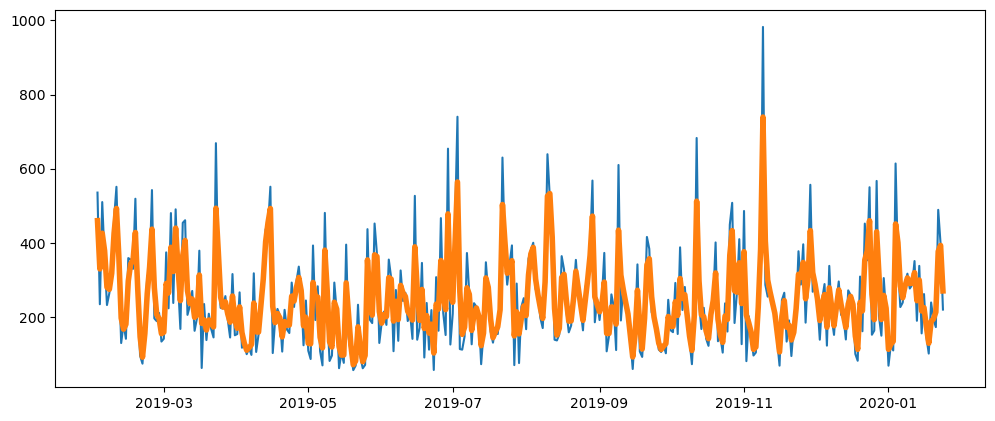

In [59]:
plt.figure(figsize=(12,5), dpi=100) 
plt.plot(train.index, train.deltainteger, label = 'deltainteger') 
plt.plot(train.index, model_fit.predict(train.fecha_numeros.values.reshape(-1,1)), lw = 4, label = 'deltainteger suma') 

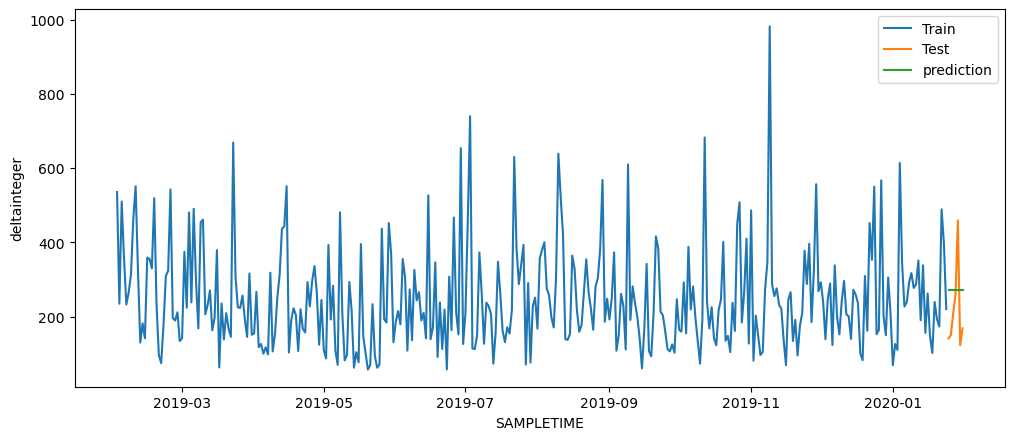

In [60]:
plt.figure(figsize=(12,5), dpi=100)
sns.lineplot(x=train.index, y= train["deltainteger"], label="Train") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test")   
sns.lineplot(x=pred.index, y= pred["deltainteger"], label="prediction")    
plt.show() 

### Metrica 2 RMSE 

In [61]:
metrica2 = sqrt(mean_squared_error(test[['deltainteger']], pred[['deltainteger']]))  
metrica2 

121.36053597162892

## Modelo KNN

In [62]:
knn = KNeighborsRegressor()
param_dist = {'n_neighbors': np.arange(3,10),  
              'weights': ['uniform'],
              'algorithm': ['auto', 'kd_tree'],
              #'criterion': ['mse'],
             }


In [63]:
model_knn = RandomizedSearchCV(knn, param_dist,n_iter=8, random_state=42, cv=5, scoring='neg_root_mean_squared_error') 

model_fit_knn = model_knn.fit(train.fecha_numeros.values.reshape(-1,1), train.deltainteger) 

In [64]:
print("Mejores parametros: "+str(model_knn.best_params_))
print("Mejor Score: "+str(model_knn.best_score_)+'\n') 

scores_knn = pd.DataFrame(model_knn.cv_results_) 
scores_knn

Mejores parametros: {'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'kd_tree'}
Mejor Score: -145.10004410795074



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000399,0.000489,0.0006,0.00049,uniform,5,kd_tree,"{'weights': 'uniform', 'n_neighbors': 5, 'algo...",-140.396821,-148.278464,-152.627050,-164.491842,-119.706044,-145.100044,14.898158,1
1,0.000200,0.000400,0.0008,0.00040,uniform,7,kd_tree,"{'weights': 'uniform', 'n_neighbors': 7, 'algo...",-135.451733,-134.086454,-151.901455,-170.969061,-170.864297,-152.654600,16.175874,7
2,0.000600,0.000490,0.0004,0.00049,uniform,3,auto,"{'weights': 'uniform', 'n_neighbors': 3, 'algo...",-168.823408,-156.111147,-159.077811,-170.896769,-119.768642,-154.935555,18.454728,8
3,0.000400,0.000490,0.0006,0.00049,uniform,8,kd_tree,"{'weights': 'uniform', 'n_neighbors': 8, 'algo...",-135.719969,-138.664902,-152.115033,-171.966143,-162.402774,-152.173764,13.781082,5
4,0.000600,0.000490,0.0006,0.00049,uniform,8,auto,"{'weights': 'uniform', 'n_neighbors': 8, 'algo...",-135.719969,-138.664902,-152.115033,-171.966143,-162.402774,-152.173764,13.781082,5
5,0.000600,0.000490,0.0004,0.00049,uniform,4,kd_tree,"{'weights': 'uniform', 'n_neighbors': 4, 'algo...",-146.968266,-138.403119,-170.122758,-161.594881,-119.649084,-147.347622,17.714674,3
6,0.000200,0.000400,0.0006,0.00049,uniform,5,auto,"{'weights': 'uniform', 'n_neighbors': 5, 'algo...",-140.396821,-148.278464,-152.627050,-164.491842,-119.706044,-145.100044,14.898158,1
7,0.000600,0.000490,0.0006,0.00049,uniform,4,auto,"{'weights': 'uniform', 'n_neighbors': 4, 'algo...",-146.968266,-138.403119,-170.122758,-161.594881,-119.649084,-147.347622,17.714674,3


### Prediccion

In [65]:
prediction_knn = model_fit_knn.predict(test.fecha_numeros.values.reshape(-1,1))    

In [66]:
pred2 = pd.DataFrame(prediction)
pred2['date'] = pd.DataFrame(pd.date_range("2020-01-25", "2020-01-31")) 
pred2.set_index("date", inplace=True)
pred2 = pred2.rename(columns={0:"deltainteger"}) 

<AxesSubplot:xlabel='SAMPLETIME', ylabel='deltainteger'>

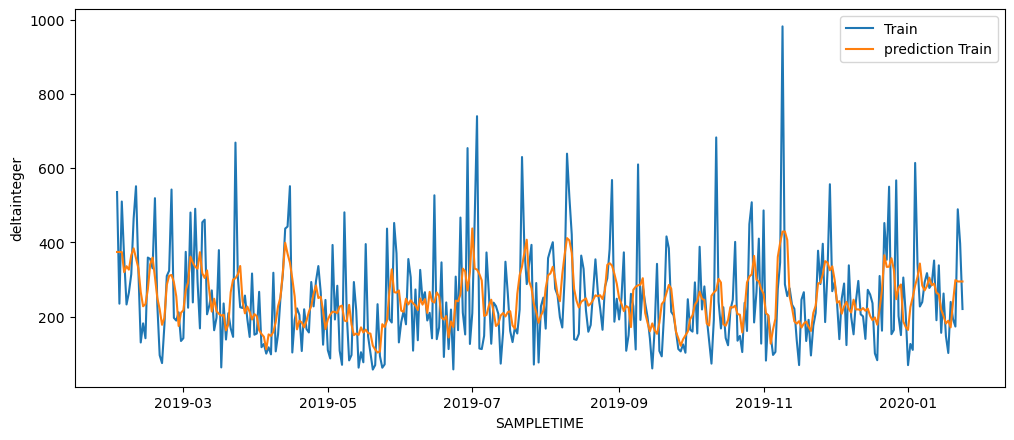

In [67]:
plt.figure(figsize=(12,5), dpi=100) 
sns.lineplot(x=train.index, y= train["deltainteger"], label="Train") 
sns.lineplot(x=train.index, y= model_fit_knn.predict(train.fecha_numeros.values.reshape(-1,1)), label="prediction Train")     

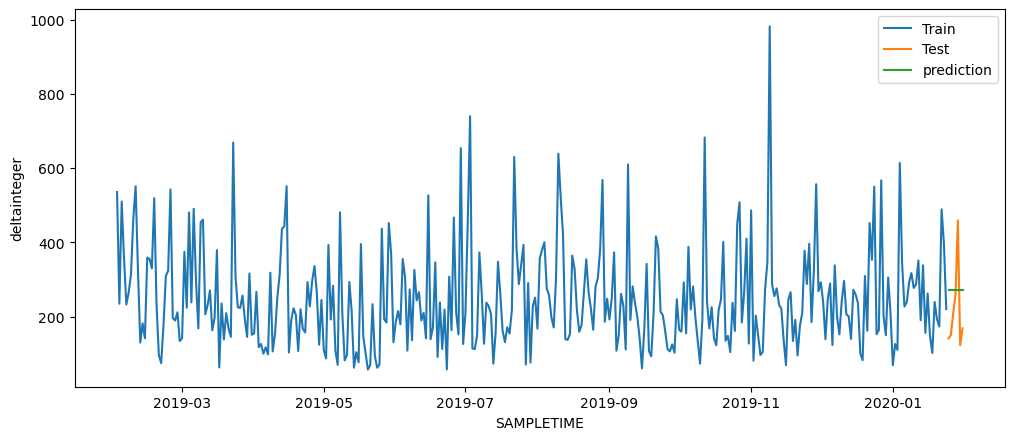

In [68]:
plt.figure(figsize=(12,5), dpi=100)
sns.lineplot(x=train.index, y= train["deltainteger"], label="Train") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test")   
sns.lineplot(x=pred2.index, y= pred["deltainteger"], label="prediction")      
plt.show() 

### Metrica

In [69]:
metrica3 = sqrt(mean_squared_error(test[['deltainteger']], pred2[['deltainteger']]))  
metrica3 

121.36053597162892

## Rolling Random Forest 

In [70]:
dd = group1_sum.copy() 
dd['rolling'] = dd.deltainteger.rolling(window = 7).sum()   
dd

,ID,deltainteger,rolling
SAMPLETIME,,,
2019-02-01,1186,535.58,NaN
2019-02-02,1186,234.58,NaN
2019-02-03,1186,510.02,NaN
2019-02-04,1186,357.00,NaN
2019-02-05,1186,232.52,NaN
...,...,...,...
2020-01-27,1186,209.00,1779.08
2020-01-28,1186,258.92,1865.00
2020-01-29,1186,459.10,1835.02


In [71]:
Rolling = dd.deltainteger.rolling(window = 7, center = False).sum() 
Rolling

SAMPLETIME
2019-02-01        NaN
2019-02-02        NaN
2019-02-03        NaN
2019-02-04        NaN
2019-02-05        NaN
               ...   
2020-01-27    1779.08
2020-01-28    1865.00
2020-01-29    1835.02
2020-01-30    1560.75
2020-01-31    1508.77
Name: deltainteger, Length: 365, dtype: float64

In [72]:
dd['fecha_numeros'] = dd.index.map(datetime.toordinal)
dd 

,ID,deltainteger,rolling,fecha_numeros
SAMPLETIME,,,,
2019-02-01,1186,535.58,NaN,737091
2019-02-02,1186,234.58,NaN,737092
2019-02-03,1186,510.02,NaN,737093
2019-02-04,1186,357.00,NaN,737094
2019-02-05,1186,232.52,NaN,737095
...,...,...,...,...
2020-01-27,1186,209.00,1779.08,737451
2020-01-28,1186,258.92,1865.00,737452
2020-01-29,1186,459.10,1835.02,737453


In [73]:
train = dd.iloc[:-7] 
test = dd.iloc[-7:]

In [74]:
rf2 =  RandomForestRegressor()
param_dist = {'n_estimators': np.arange(80,100),
              'max_features': ['auto'],
              'criterion': ['mse'],
             }

In [75]:
model2 = RandomizedSearchCV(rf2, param_dist,n_iter=8, random_state=42, cv=5,scoring='neg_root_mean_squared_error')

model_fit2 = model2.fit(train.fecha_numeros.values.reshape(-1,1), train.deltainteger) 

In [76]:
print("Mejores parametros: "+str(model2.best_params_))
print("Mejor Score: "+str(model2.best_score_)+'\n')

scores = pd.DataFrame(model2.cv_results_)
scores

Mejores parametros: {'n_estimators': 97, 'max_features': 'auto', 'criterion': 'mse'}
Mejor Score: -164.5998658216839



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071835,0.001335,0.005415,0.000496,80,auto,mse,"{'n_estimators': 80, 'max_features': 'auto', '...",-213.417132,-175.309202,-166.561425,-178.387342,-119.753040,-170.685628,30.059318,7
1,0.085810,0.000759,0.005999,0.000005,97,auto,mse,"{'n_estimators': 97, 'max_features': 'auto', '...",-202.573682,-164.668696,-159.697148,-175.124659,-120.935144,-164.599866,26.394815,1
2,0.085005,0.000624,0.005995,0.000012,95,auto,mse,"{'n_estimators': 95, 'max_features': 'auto', '...",-219.895972,-167.859899,-162.243665,-175.717315,-121.459511,-169.435272,31.437624,6
3,0.070800,0.000398,0.004998,0.000003,81,auto,mse,"{'n_estimators': 81, 'max_features': 'auto', '...",-201.523919,-167.875287,-161.478840,-175.603862,-119.610659,-165.218514,26.559586,2
4,0.077201,0.000400,0.005599,0.000489,88,auto,mse,"{'n_estimators': 88, 'max_features': 'auto', '...",-236.542587,-175.577851,-157.206207,-178.363378,-120.103894,-173.558783,37.733148,8
5,0.074402,0.000491,0.005798,0.000399,85,auto,mse,"{'n_estimators': 85, 'max_features': 'auto', '...",-202.463902,-169.533518,-160.703734,-173.643737,-120.930059,-165.454990,26.299785,3
6,0.079400,0.000490,0.005202,0.000399,91,auto,mse,"{'n_estimators': 91, 'max_features': 'auto', '...",-206.514503,-172.841732,-161.013993,-176.184377,-120.936604,-167.498242,27.699466,5
7,0.072397,0.000488,0.005002,0.000005,83,auto,mse,"{'n_estimators': 83, 'max_features': 'auto', '...",-214.011634,-164.903021,-156.050923,-175.766129,-120.755543,-166.297450,30.157255,4


### Prediccion

In [77]:
prediction_rf2 = model_fit2.predict(test.fecha_numeros.values.reshape(-1,1))   

In [78]:
pred_rf2 = pd.DataFrame(prediction_rf2)
pred_rf2['date'] = pd.DataFrame(pd.date_range("2020-01-25", "2020-01-31")) 
pred_rf2.set_index("date", inplace=True)
pred_rf2 = pred_rf2.rename(columns={0:"deltainteger"})  

<AxesSubplot:xlabel='SAMPLETIME', ylabel='deltainteger'>

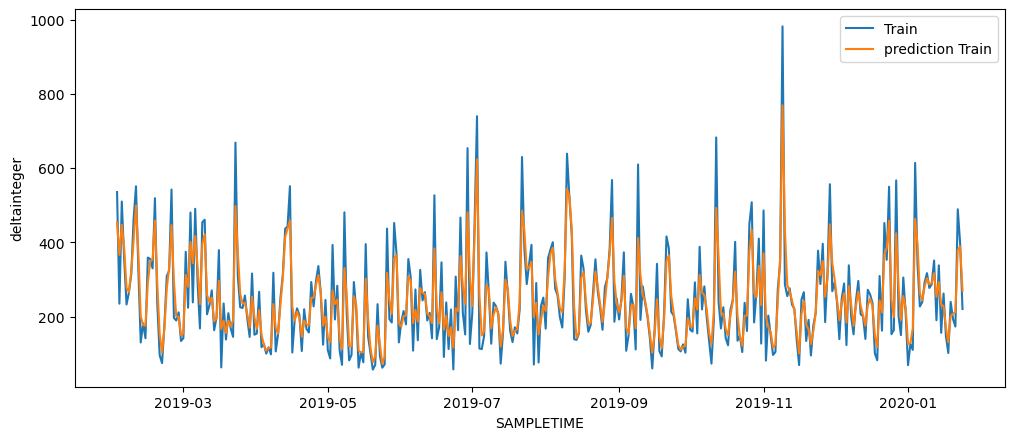

In [79]:
plt.figure(figsize=(12,5), dpi=100) 
sns.lineplot(x=train.index, y= train["deltainteger"], label="Train") 
sns.lineplot(x=train.index, y= model_fit2.predict(train.fecha_numeros.values.reshape(-1,1)), label="prediction Train")     

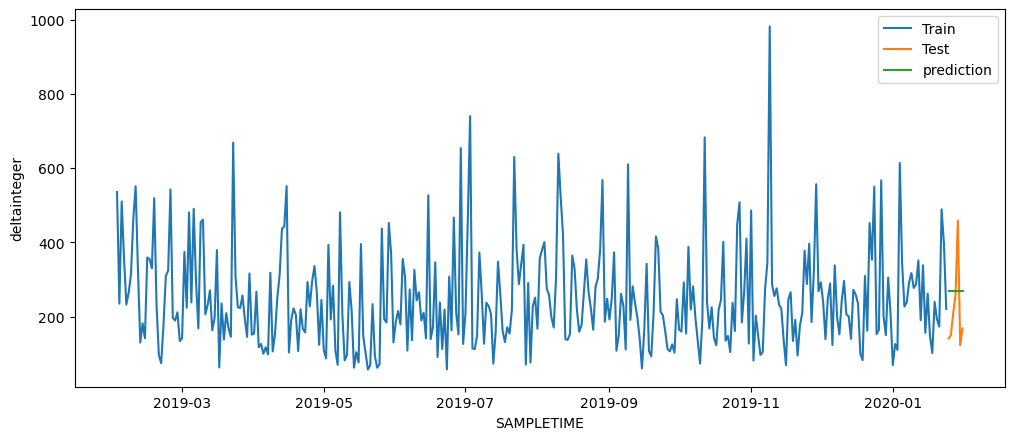

In [80]:
plt.figure(figsize=(12,5), dpi=100)
sns.lineplot(x=train.index, y= train["deltainteger"], label="Train") 
sns.lineplot(x=test.index, y= test["deltainteger"], label="Test")   
sns.lineplot(x=pred_rf2.index, y= pred_rf2["deltainteger"], label="prediction")       
plt.show() 

### Metrica

In [81]:
metrica4 = sqrt(mean_squared_error(test[['deltainteger']], pred_rf2[['deltainteger']]))   
metrica4 

120.77560841040359

## Comparacion de Metricas 

In [95]:
Metricas = pd.DataFrame([metrica,metrica2,metrica3,metrica4]) 
Metricas = Metricas.rename(columns={0: 'RMSE'})   
Metricas['Modelos'] = np.array(['SARIMAX','Random Forest', 'KNN', 'Rolling Randon Forest'])  
Metricas.set_index("Modelos", inplace = True)   
Metricas 

,RMSE
Modelos,
SARIMAX,195.101614
Random Forest,121.360536
KNN,121.360536
Rolling Randon Forest,120.775608
